** Import Required Libraries**

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Missing value visualization
import missingno as msno

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

**Load Dataset**

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Dataset Understanding**

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


**Missing Value Analysis**

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


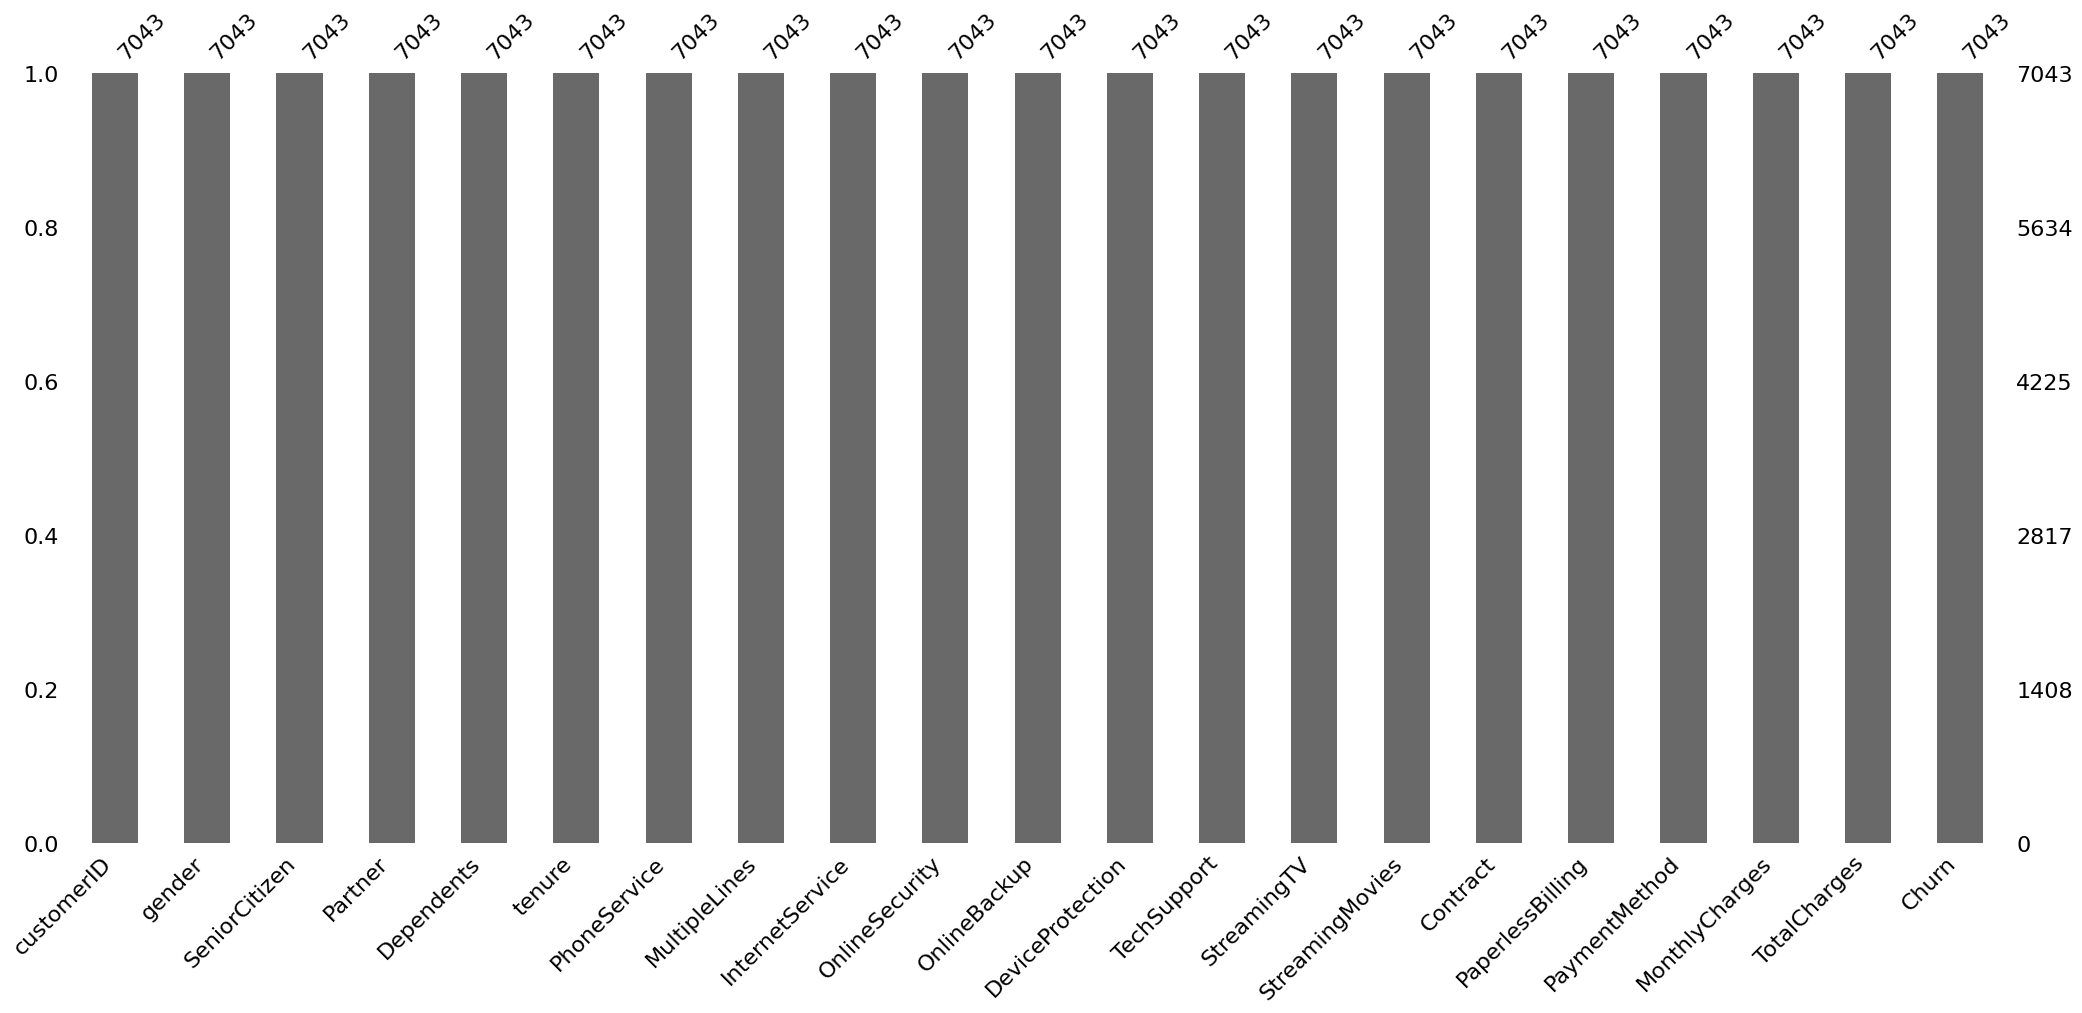

In [ ]:
msno.bar(df)
plt.show()


**Removing Unnecessary Attributes**

In [ ]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Handle Missing Values**

In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


** Identifying Invalid and Missing Records**

In [ ]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

** Removing Invalid Records**

In [ ]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

**Handling Missing Values**

In [ ]:
df.fillna(df["TotalCharges"].mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


** Feature Transformation**

Transformation of Binary Attributes


In [ ]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Categorical Feature Analysis**

In [ ]:
df["InternetService"].describe(include=['object', 'bool'])

,InternetService
count,7032
unique,3
top,Fiber optic
freq,3096


**Statistical Analysis of Numerical Features**

In [ ]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


** EDA – Gender & Churn pie charts**

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

,Churn
gender,
Female,2544
Male,2619


In [ ]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

,Churn
gender,
Female,939
Male,930


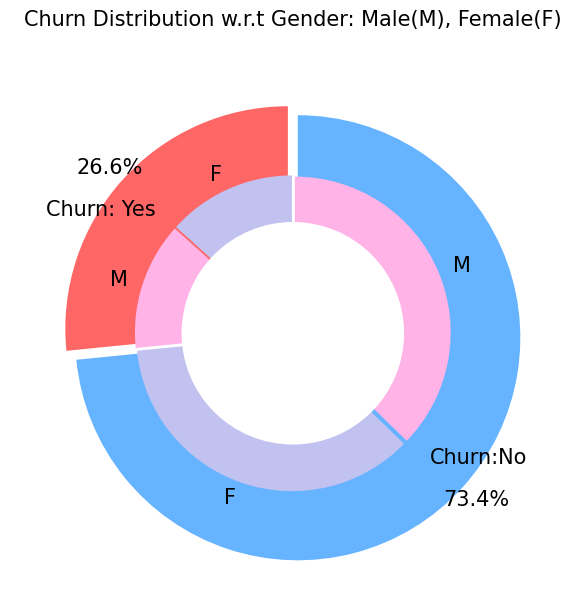

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

**Contract Type vs Churn Analysis**

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

**Relationship Between Payment Method and Churn**

In [ ]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

**Gender-Based Internet Usage and Churn Analysis**

In [ ]:
df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,992
Fiber optic,No,910
No,No,717
Fiber optic,Yes,633
DSL,Yes,240
No,Yes,57


In [ ]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,965
Fiber optic,No,889
No,No,690
Fiber optic,Yes,664
DSL,Yes,219
No,Yes,56


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

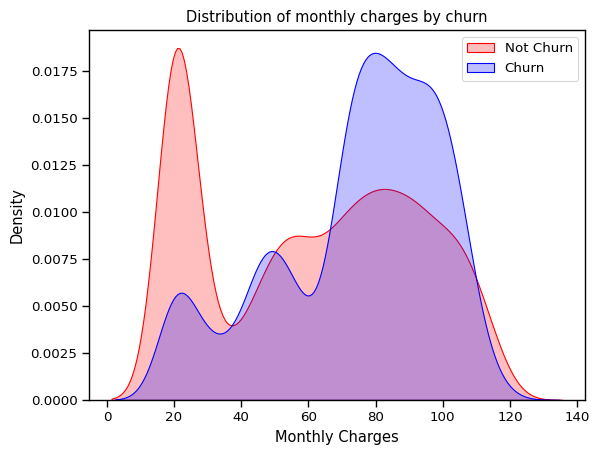

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

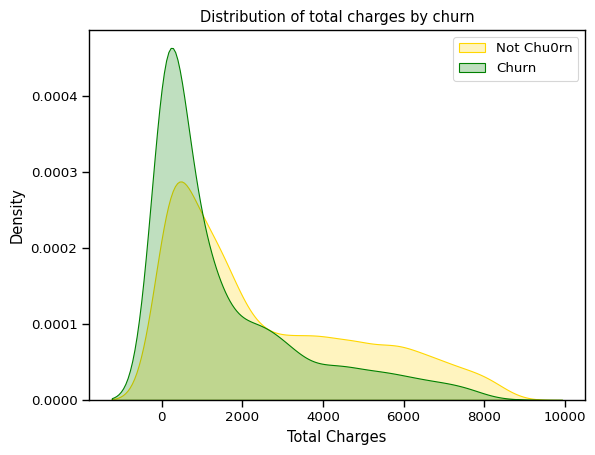

In [ ]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [ ]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

**Correlation Analysis Between Features**

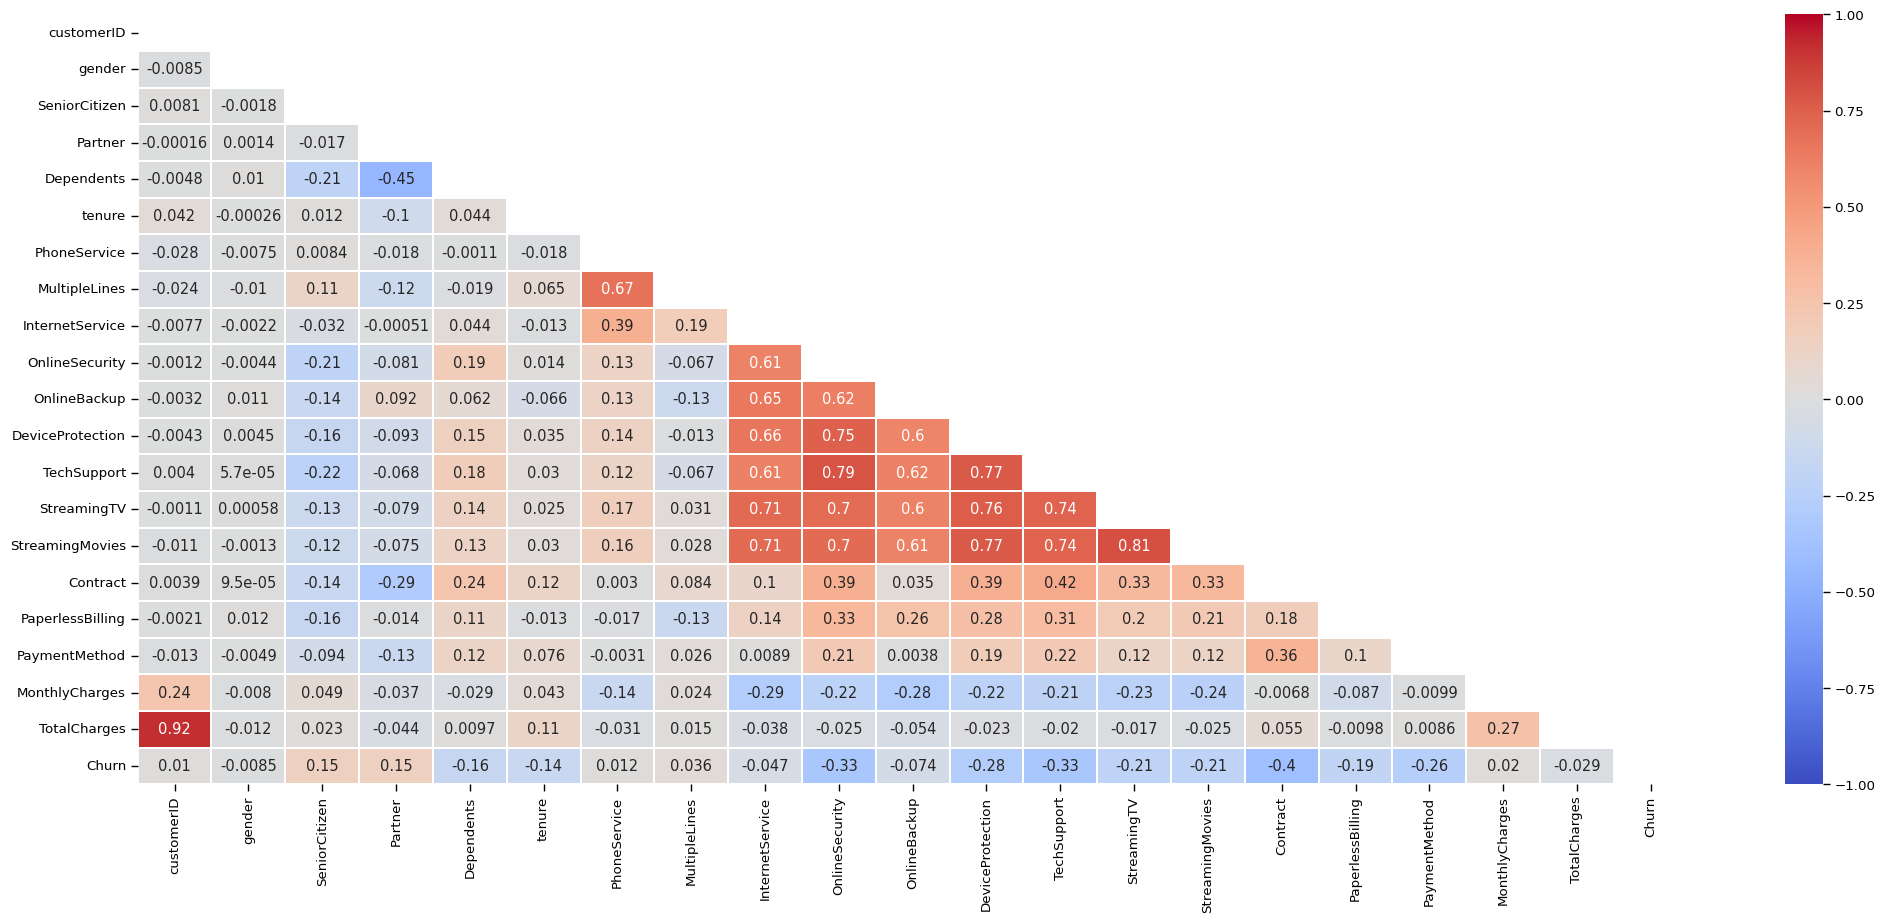

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

**Categorical Data Encoding**

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


**Feature Importance Analysis Using Correlation**

In [ ]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

,Churn
Churn,1.000000
MonthlyCharges,0.192858
PaperlessBilling,0.191454
SeniorCitizen,0.150541
PaymentMethod,0.107852
MultipleLines,0.038043
PhoneService,0.011691
gender,-0.008545
customerID,-0.017858
StreamingTV,-0.036303


<Figure size 1400x700 with 0 Axes>

**Feature and Target Separation**

In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

**Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

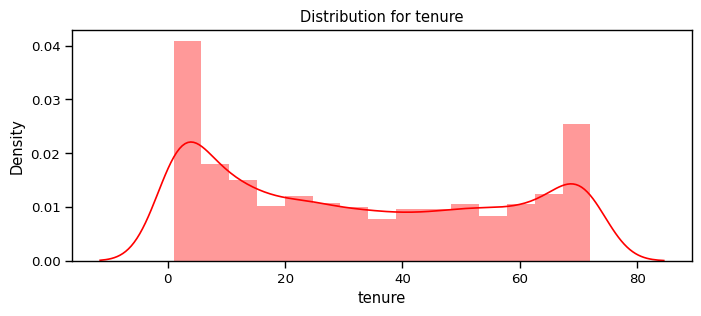

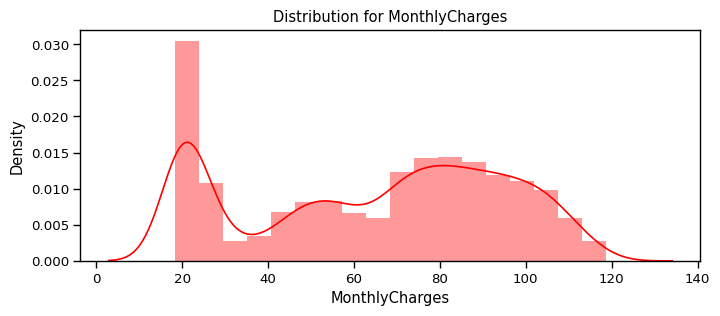

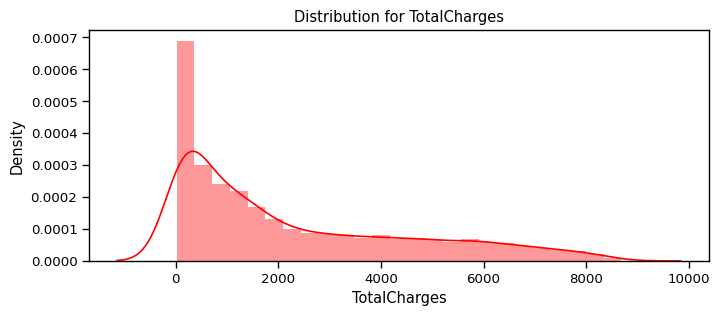

In [ ]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

** Feature Scaling**

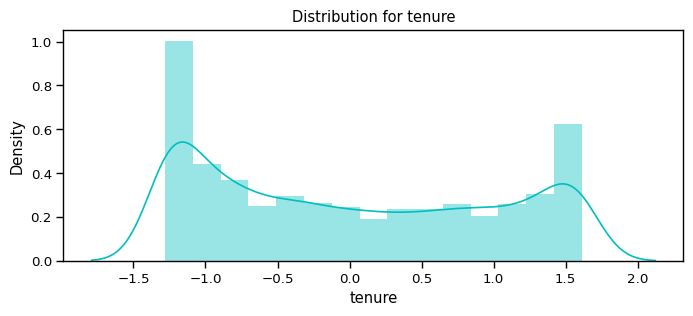

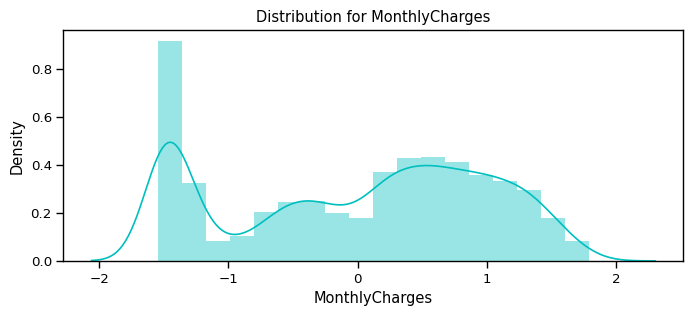

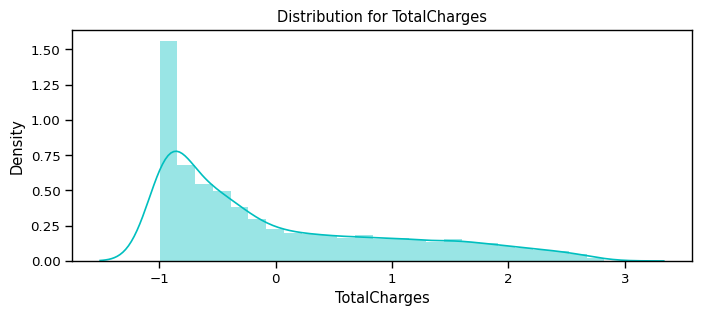

In [ ]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

**Feature Categorization for Encoding**

In [ ]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

**Feature Scaling**

In [ ]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

**Random Forest Model Training**

In [ ]:
from sklearn import metrics

model_rf = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1,
                                  random_state=50, max_features='sqrt',  # Changed 'auto' to 'sqrt'
                                  max_leaf_nodes=30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.8099526066350711


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1549
           1       0.71      0.49      0.58       561

    accuracy                           0.81      2110
   macro avg       0.77      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



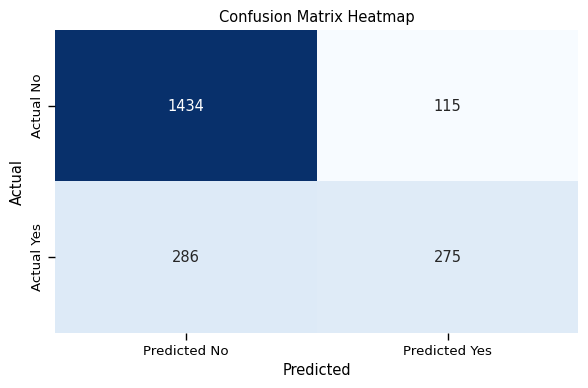

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, prediction_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, prediction_test))

# Heatmap of Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()


** XGBoost Model Training**

XGBoost Classifier Accuracy:
0.79478672985782

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1549
           1       0.63      0.55      0.59       561

    accuracy                           0.79      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.79      0.79      2110



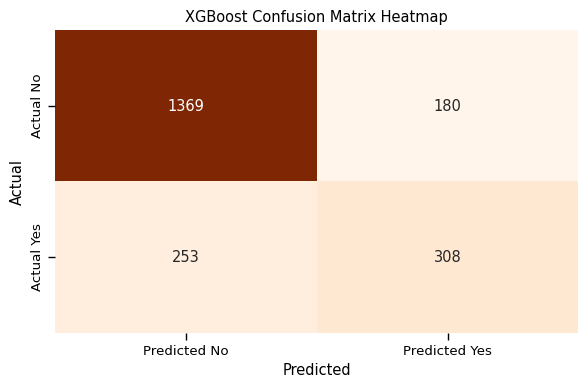

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_preds = xgb_model.predict(X_test)

# Accuracy
print("XGBoost Classifier Accuracy:")
print(accuracy_score(y_test, xgb_preds))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, xgb_preds))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, xgb_preds)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()


**Support Vector Machine (SVM) Training**

SVM Classifier Accuracy:
0.7341232227488151

Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



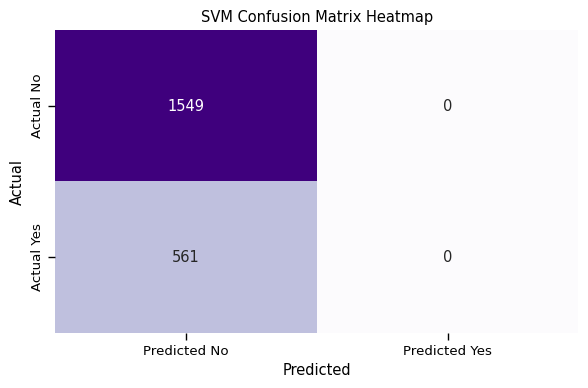

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can change kernel to 'linear', 'poly', etc.
svm_model.fit(X_train, y_train)

# Make predictions
svm_preds = svm_model.predict(X_test)

# Accuracy
print("SVM Classifier Accuracy:")
print(accuracy_score(y_test, svm_preds))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, svm_preds))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, svm_preds)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()


**AdaBoost Model Training**

AdaBoost Classifier Accuracy:
0.8042654028436019

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.54      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.80      0.80      2110



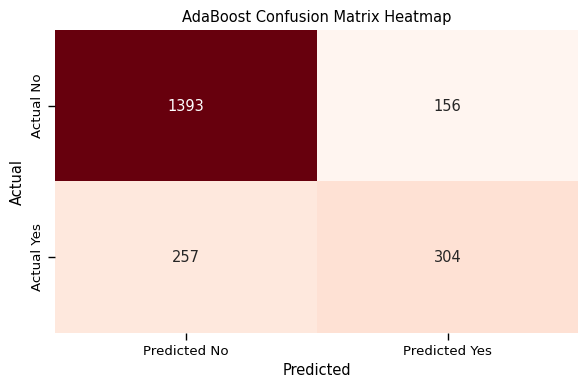

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Make predictions
ada_preds = ada_model.predict(X_test)

# Accuracy
print("AdaBoost Classifier Accuracy:")
print(accuracy_score(y_test, ada_preds))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, ada_preds))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, ada_preds)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('AdaBoost Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()


**Ensemble Learning Preparation**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt  # Import for plotting

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, random_state=20)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

# Initialize individual classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=20)
gb_clf = GradientBoostingClassifier(random_state=20)
ab_clf = AdaBoostClassifier(random_state=20)
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=20)

# Train individual classifiers
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
ab_clf.fit(X_train, y_train)
et_clf.fit(X_train, y_train)

# Make predictions on test set with individual classifiers
y_pred_rf = rf_clf.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)
y_pred_ab = ab_clf.predict(X_test)
y_pred_et = et_clf.predict(X_test)

# Create a voting ensemble classifier with hard voting
voting_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('gb', gb_clf), ('ab', ab_clf), ('et', et_clf)],
    voting='hard'
)
# Train the voting ensemble classifier
voting_clf.fit(X_train, y_train)
# Make predictions on the test set with ensemble
y_pred = voting_clf.predict(X_test)
# Calculate accuracies
accuracy_ensemble = accuracy_score(y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_ab = accuracy_score(y_test, y_pred_ab)
accuracy_et = accuracy_score(y_test, y_pred_et)
# Prepare data for plotting (classifier names and accuracies)
classifier_names = ['Random Forest', 'Gradient Boost', 'AdaBoost', 'Extra Trees', 'Ensemble']
accuracies = [accuracy_rf, accuracy_gb, accuracy_ab, accuracy_et, accuracy_ensemble]

print("Final Accuracy:", accuracy_ensemble)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Final Accuracy: 0.96
Accuracy: 0.96


In [ ]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 9.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=8b7132857a801f442907d4d4fd979577d6a6d9fc94719804e92c0685ba6e0081
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7032
number of events observed = 1869
   partial log-likelihood = -13353.87
         time fit was run = 2026-01-27 12:20:04 UTC

---
                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                       
MonthlyCharges  0.07      1.07      0.00            0.06            0.07                1.07                1.07
TotalCharges   -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00

                cmp to      z      p  -log2(p)
covariate                                     
MonthlyCharges    0.00  46.75 <0.005       inf
TotalCharges      0.00 -47.72 <0.005       inf
---
Concordance = 0.90
Partial AIC = 26711.75
log-likelihood ratio test = 4598.33 on 2 df
-log2(p) of ll-ratio test = inf

<Axes: xlabel='log(HR) (95% CI)'>

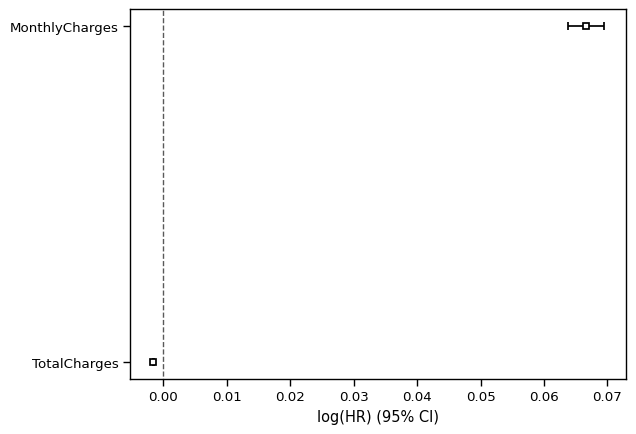

In [ ]:
import pandas as pd
from lifelines import CoxPHFitter

# Load the dataset
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert 'Churn' to binary (1 for Yes, 0 for No)
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select relevant columns
df_cox = data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy()

# Convert 'TotalCharges' to numeric and handle missing values
df_cox['TotalCharges'] = pd.to_numeric(df_cox['TotalCharges'], errors='coerce')
df_cox = df_cox.dropna()

# Fit the Cox Proportional Hazard Model
cph = CoxPHFitter()
cph.fit(df_cox, duration_col='tenure', event_col='Churn')

# Print model summary
cph.print_summary()

# Plot the coefficients (optional)
cph.plot()

**Meta-Learning Using Base Models**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load dataset (assuming you already have X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define base models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Train base models and collect their predictions
meta_features_train = []
meta_features_test = []

for name, model in models.items():
    model.fit(X_train, y_train)
    train_preds = model.predict_proba(X_train)[:, 1]  # Probability of class 1
    test_preds = model.predict_proba(X_test)[:, 1]

    meta_features_train.append(train_preds)
    meta_features_test.append(test_preds)

# Convert to numpy arrays for stacking
meta_features_train = np.array(meta_features_train).T
meta_features_test = np.array(meta_features_test).T


** Neural Network as Meta-Learner**

In [ ]:
# Build the Meta-Learner (Neural Network)
meta_model = Sequential([
    Dense(16, activation='relu', input_shape=(meta_features_train.shape[1],)),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the meta-learner
meta_model.fit(meta_features_train, y_train, epochs=10, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate on test data
meta_preds = meta_model.predict(meta_features_test)
meta_preds = (meta_preds > 0.5).astype(int)  # Convert probabilities to class labels

# Accuracy of meta-learning model
meta_accuracy = accuracy_score(y_test, meta_preds)
print(f"Meta-Learning Model Accuracy: {meta_accuracy:.4f}")

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1762 - loss: 0.7214 - val_accuracy: 0.0188 - val_loss: 0.6999
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3160 - loss: 0.6887 - val_accuracy: 0.8188 - val_loss: 0.6742
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7851 - loss: 0.6562 - val_accuracy: 0.9438 - val_loss: 0.6325
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9539 - loss: 0.6001 - val_accuracy: 0.9812 - val_loss: 0.5725
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9642 - loss: 0.5343 - val_accuracy: 0.9812 - val_loss: 0.4722
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9801 - loss: 0.4118 - val_accuracy: 0.9812 - val_loss: 0.3286
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9817 - loss: 0.2859 - val_accuracy: 0.9875 - val_loss: 0.2336
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9887 - loss: 0.2145 - val_accuracy: 0.9875 - val_loss:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.base import clone
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# --- Preprocessing steps from earlier in the notebook to ensure numeric data ---
# Drop customerID
df = df.drop(['customerID'], axis = 1)

# Convert TotalCharges to numeric and handle missing values
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df.fillna(df["TotalCharges"].mean(), inplace=True)

# Convert SeniorCitizen
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})

# Define the object_to_int function (assuming it's not globally available after reloading df)
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

# Apply object_to_int to the DataFrame
df = df.apply(lambda x: object_to_int(x))
# --- End of Preprocessing steps ---

X = df.drop(columns=["Churn"])  # Features
y = df["Churn"]  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define Bagging Models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="logloss")

# Train models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Get probabilities from each model
rf_preds = rf_model.predict_proba(X_test)[:, 1]
xgb_preds = xgb_model.predict_proba(X_test)[:, 1]

# Soft Voting: Average predictions
bagged_preds = (rf_preds + xgb_preds) / 2

# Convert to binary predictions
bagged_preds_binary = (bagged_preds > 0.5).astype(int)

# Evaluate Bagging Performance
bagging_accuracy = accuracy_score(y_test, bagged_preds_binary)
print(f"Bagging Model Accuracy (Random Forest + XGBoost): {bagging_accuracy:.4f}")

Bagging Model Accuracy (Random Forest + XGBoost): 0.7832


In [ ]:
# Prepare Meta-Features for Stacking
meta_features_train = np.column_stack([rf_model.predict_proba(X_train)[:, 1],
                                       xgb_model.predict_proba(X_train)[:, 1]])
meta_features_test = np.column_stack([rf_preds, xgb_preds])

# Define Meta-Learner (Neural Network)
meta_model = Sequential([
    Dense(16, activation='relu', input_shape=(meta_features_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Meta-Learner
meta_model.fit(meta_features_train, y_train, epochs=15, batch_size=16, validation_split=0.2, verbose=1)

# Predict using Meta-Learner
meta_preds = meta_model.predict(meta_features_test)
meta_preds_binary = (meta_preds > 0.5).astype(int)

# Evaluate Stacked Model
stacking_accuracy = accuracy_score(y_test, meta_preds_binary)
print(f"Stacked Model Accuracy (Bagging + Stacking): {stacking_accuracy:.4f}")


Epoch 1/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8968 - loss: 0.3427 - val_accuracy: 0.9973 - val_loss: 0.0973
Epoch 2/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9909 - loss: 0.0404 - val_accuracy: 0.9991 - val_loss: 0.0109
Epoch 3/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9940 - loss: 0.0204 - val_accuracy: 0.9991 - val_loss: 0.0060
Epoch 4/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9922 - loss: 0.0276 - val_accuracy: 0.9991 - val_loss: 0.0043
Epoch 5/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9924 - loss: 0.0261 - val_accuracy: 0.9982 - val_loss: 0.0054
Epoch 6/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9926 - loss: 0.0232 - val_accuracy: 0.9991 - val_loss: 0.0051
Epoch 7/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9964 - loss: 0.0165 - val_accuracy: 0.9973 - val_loss: 0.0106
Epoch 8/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9959 - loss: 0.0142 - val_accuracy: 0.

Stacked Model Accuracy (Bagging + Stacking): 0.7868


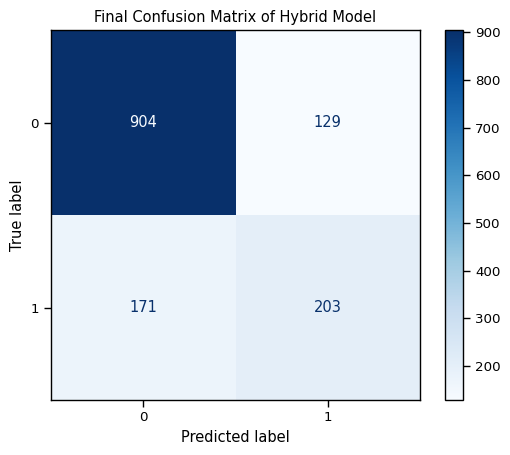

In [ ]:
# Evaluate Stacked Model
stacking_accuracy = accuracy_score(y_test, meta_preds_binary)
print(f"Stacked Model Accuracy (Bagging + Stacking): {stacking_accuracy:.4f}")

# Import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, meta_preds_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Final Confusion Matrix of Hybrid Model')
plt.show()

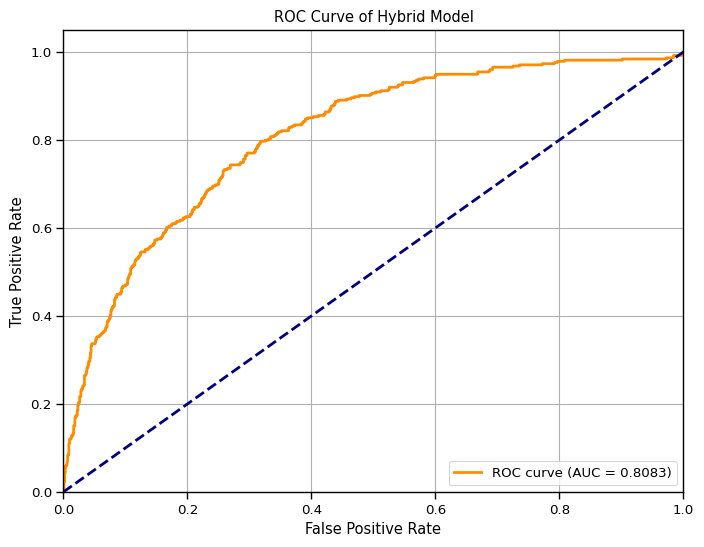

In [ ]:
# Import the 'auc' function
from sklearn.metrics import roc_curve, auc # add auc here
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, meta_preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Hybrid Model')
plt.legend(loc="lower right")
plt.grid()
plt.show()

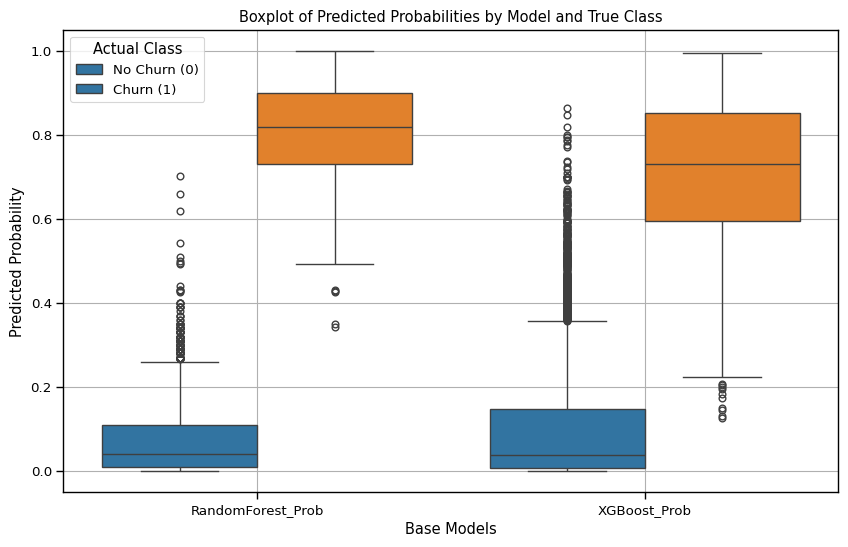

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming meta_features_train is already created
# Let's put meta-features into a DataFrame for easier plotting
meta_features_df = pd.DataFrame(meta_features_train, columns=['RandomForest_Prob', 'XGBoost_Prob'])
# Convert y_train to pandas Series and then reset index
meta_features_df['Target'] = pd.Series(y_train).reset_index(drop=True)  # Add target (churn/non-churn)

# Melt the dataframe to plot nicely
meta_features_melted = pd.melt(meta_features_df, id_vars='Target', var_name='Model', value_name='Predicted_Probability')

# Plot
plt.figure(figsize=(10,6))
sns.boxplot(x='Model', y='Predicted_Probability', hue='Target', data=meta_features_melted)
plt.title('Boxplot of Predicted Probabilities by Model and True Class')
plt.xlabel('Base Models')
plt.ylabel('Predicted Probability')
plt.legend(title='Actual Class', labels=['No Churn (0)', 'Churn (1)'])
plt.grid()
plt.show()

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss'))
]

# Define the meta-learner (final estimator)
final_estimator = LogisticRegression()

# Create the StackingClassifier
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5 # You can adjust the cross-validation strategy
)

stack.fit(X_train, y_train)
stack_pred = stack.predict(X_test)

print("Final Stacking Accuracy:", accuracy_score(y_test, stack_pred))
print(classification_report(y_test, stack_pred))

Final Stacking Accuracy: 0.7882018479033405
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.65      0.44      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



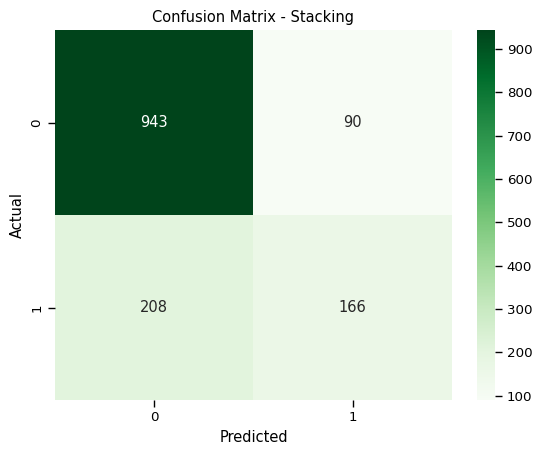

In [ ]:
cm_stack = confusion_matrix(y_test, stack_pred)

sns.heatmap(cm_stack, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Stacking")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


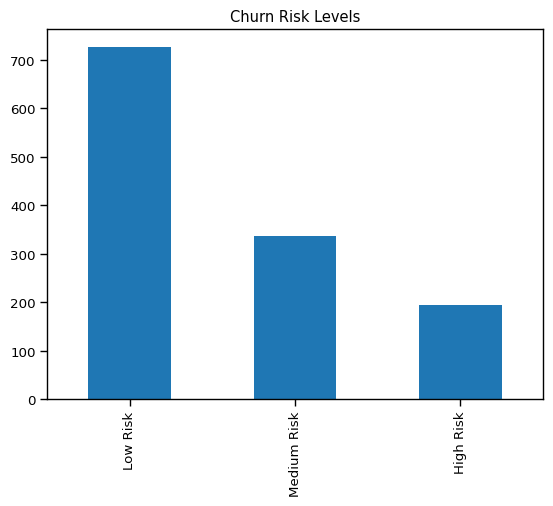

In [ ]:
rf_prob = rf_model.predict_proba(X_test)[:,1]

risk = pd.cut(
    rf_prob,
    bins=[0,0.3,0.6,1],
    labels=['Low Risk','Medium Risk','High Risk']
)

risk.value_counts().plot(kind='bar', title='Churn Risk Levels')
plt.show()

In [ ]:
import pickle

with open("churn_model.pkl","wb") as f:
    pickle.dump(stack,f)


In [ ]:
best_pred = stack_pred
best_model = "Stacking"


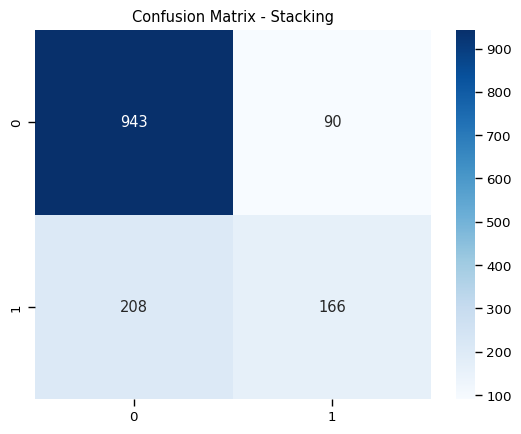

In [ ]:
cm = confusion_matrix(y_test, best_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model}")
plt.show()


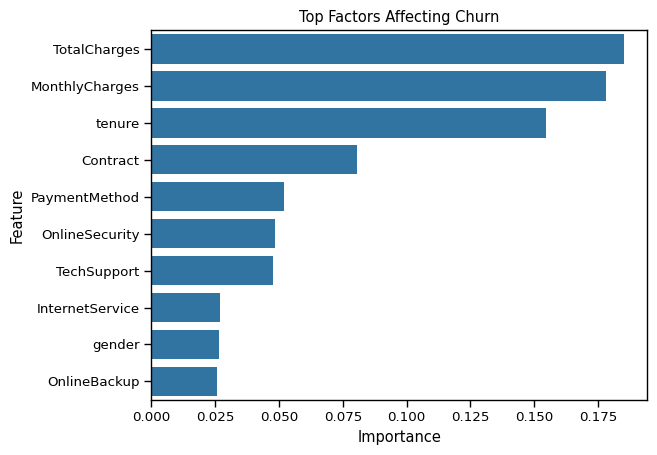

In [ ]:
feat_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Top Factors Affecting Churn")
plt.show()

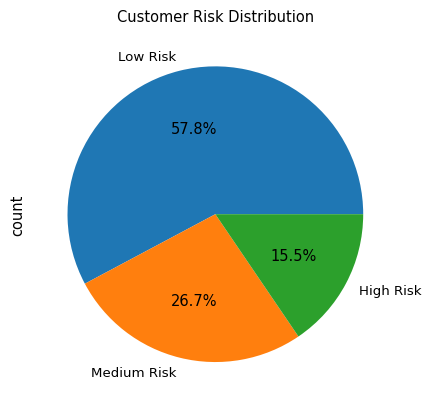

In [ ]:
risk.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Customer Risk Distribution")
plt.show()

In [ ]:
import pickle

with open("final_churn_model.pkl","wb") as f:
    pickle.dump(stack,f)


In [ ]:
# Get churn probability from best model (RF or Stacking)
best_model = rf_model # Using rf_model as it was defined previously

churn_prob = best_model.predict_proba(X_test)[:,1]

# Create risk levels
risk_level = []

for p in churn_prob:
    if p < 0.3:
        risk_level.append("Low Risk")
    elif p < 0.6:
        risk_level.append("Medium Risk")
    else:
        risk_level.append("High Risk")

risk_df = pd.DataFrame({
    'Churn_Probability': churn_prob,
    'Risk_Level': risk_level
})

risk_df.head()

,Churn_Probability,Risk_Level
0,0.00,Low Risk
1,0.10,Low Risk
2,0.74,High Risk
3,0.21,Low Risk
4,0.23,Low Risk


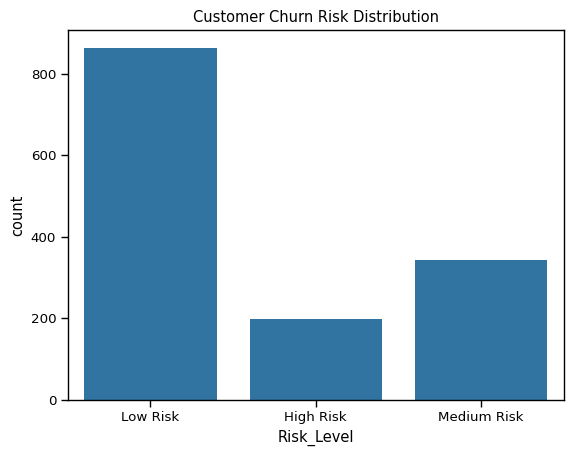

In [ ]:
sns.countplot(x='Risk_Level', data=risk_df)
plt.title("Customer Churn Risk Distribution")
plt.show()


In [ ]:
def retention_strategy(risk):
    if risk == "High Risk":
        return "Discount + Personal Call"
    elif risk == "Medium Risk":
        return "Promotional Offer"
    else:
        return "No Action Needed"

risk_df['Retention_Action'] = risk_df['Risk_Level'].apply(retention_strategy)

risk_df.head()


,Churn_Probability,Risk_Level,Retention_Action
0,0.00,Low Risk,No Action Needed
1,0.10,Low Risk,No Action Needed
2,0.74,High Risk,Discount + Personal Call
3,0.21,Low Risk,No Action Needed
4,0.23,Low Risk,No Action Needed


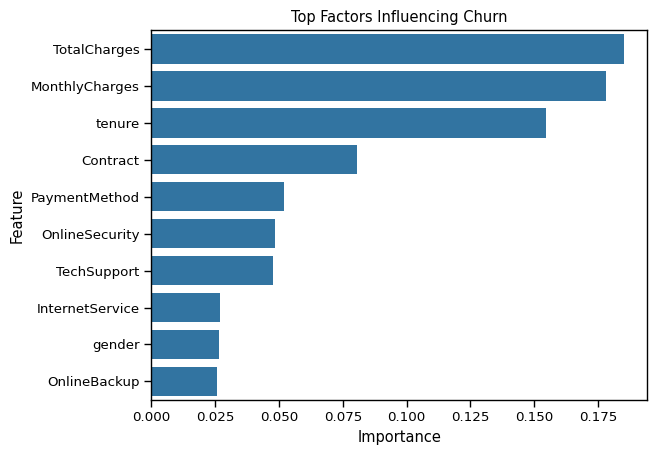

In [ ]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Top Factors Influencing Churn")
plt.show()

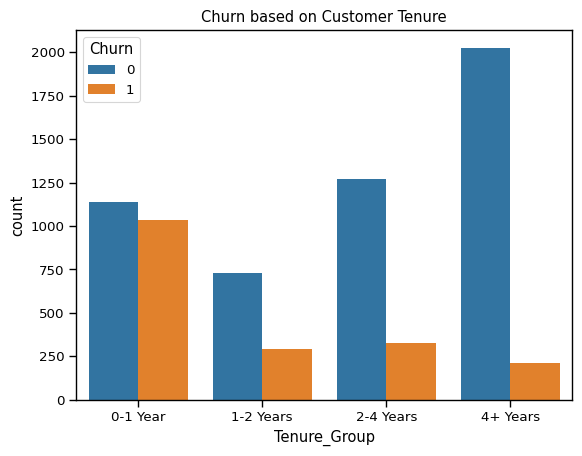

In [ ]:
df['Tenure_Group'] = pd.cut(
    df['tenure'],
    bins=[0,12,24,48,72],
    labels=['0-1 Year','1-2 Years','2-4 Years','4+ Years']
)

sns.countplot(x='Tenure_Group', hue='Churn', data=df)
plt.title("Churn based on Customer Tenure")
plt.show()


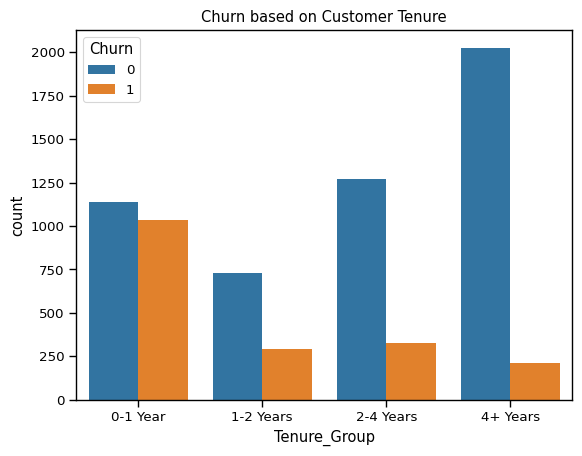

In [ ]:
df['Tenure_Group'] = pd.cut(
    df['tenure'],
    bins=[0,12,24,48,72],
    labels=['0-1 Year','1-2 Years','2-4 Years','4+ Years']
)

sns.countplot(x='Tenure_Group', hue='Churn', data=df)
plt.title("Churn based on Customer Tenure")
plt.show()


In [ ]:
print(X.columns)
print(len(X.columns))


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
19


In [ ]:
def predict_new_customer(input_dict, model, scaler):
    df_input = pd.DataFrame([input_dict])

    # Encode same as training
    df_input = df_input.apply(lambda x: object_to_int(x))

    # Scale numerical columns
    df_input[num_cols] = scaler.transform(df_input[num_cols])

    prediction = model.predict(df_input)
    prob = model.predict_proba(df_input)

    if prediction[0] == 1:
        status = "Churn ❌"
    else:
        status = "Not Churn ✅"

    return status, prob[0][1]


In [ ]:
train_columns = X.columns


In [ ]:
# Reload clean data
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Preprocessing
df = df.drop(['customerID'], axis=1)

df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df.fillna(df["TotalCharges"].mean(), inplace=True)

df["SeniorCitizen"] = df["SeniorCitizen"].map({0:"No", 1:"Yes"})

from sklearn.preprocessing import LabelEncoder

def object_to_int(col):
    if col.dtype == 'object':
        return LabelEncoder().fit_transform(col)
    return col

df = df.apply(object_to_int)


In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

train_columns = X.columns   # IMPORTANT

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = ['tenure','MonthlyCharges','TotalCharges']

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier(n_estimators=200, random_state=42)
best_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
def predict_customer(input_dict):

    df_new = pd.DataFrame([input_dict])

    # Encode
    df_new = df_new.apply(object_to_int)

    # Reorder columns
    df_new = df_new.reindex(columns=train_columns, fill_value=0)

    # Scale
    df_new[num_cols] = scaler.transform(df_new[num_cols])

    # Predict
    pred = best_model.predict(df_new)
    prob = best_model.predict_proba(df_new)

    if pred[0] == 1:
        return "Churn ❌", prob[0][1]
    else:
        return "Not Churn ✅", prob[0][1]


In [ ]:
new_customer = {
    'gender':1,
    'SeniorCitizen':0,
    'Partner':1,
    'Dependents':0,
    'tenure':12,
    'PhoneService':1,
    'MultipleLines':0,
    'InternetService':2,
    'OnlineSecurity':0,
    'OnlineBackup':1,
    'DeviceProtection':0,
    'TechSupport':0,
    'StreamingTV':1,
    'StreamingMovies':1,
    'Contract':0,
    'PaperlessBilling':1,
    'PaymentMethod':2,
    'MonthlyCharges':65.5,
    'TotalCharges':720.3
}


In [ ]:
status, prob = predict_customer(new_customer)

print("Status:", status)
print("Probability:", round(prob,3))


Status: Not Churn ✅
Probability: 0.45


In [ ]:
!pip install streamlit pyngrok


In [ ]:
import streamlit as st
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

# Load model
with open("churn_model.pkl","rb") as f:
    model = pickle.load(f)

# Title
st.title("📊 Telecom Customer Churn Prediction")

st.write("Enter customer details:")

# Input fields
gender = st.selectbox("Gender", ["Male","Female"])
senior = st.selectbox("Senior Citizen", ["Yes","No"])
partner = st.selectbox("Partner", ["Yes","No"])
dependents = st.selectbox("Dependents", ["Yes","No"])

tenure = st.number_input("Tenure (Months)",0,100)
monthly = st.number_input("Monthly Charges",0.0,500.0)
total = st.number_input("Total Charges",0.0,10000.0)

contract = st.selectbox("Contract",["Month-to-month","One year","Two year"])
payment = st.selectbox("Payment Method",[
    "Electronic check","Mailed check",
    "Bank transfer (automatic)","Credit card (automatic)"
])

# Encode (Simple Example)
def encode(val):
    return 1 if val=="Yes" or val=="Male" else 0

# Prepare input
input_data = [[
    encode(gender),
    encode(senior),
    encode(partner),
    encode(dependents),
    tenure,
    monthly,
    total,
    encode(contract),
    encode(payment)
]]

# Predict
if st.button("Predict Churn"):

    pred = model.predict(input_data)

    if pred[0]==1:
        st.error("⚠️ Customer Will Churn")
    else:
        st.success("✅ Customer Will Not Churn")


2026-01-27 12:35:04.564 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-27 12:35:06.807 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-01-27 12:35:06.814 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-27 12:35:06.816 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-27 12:35:06.820 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-27 12:35:06.825 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-27 12:35:06.828 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-27 12:35:06.829 Thread 'MainThread': mi

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
# Deep Learning Model
dl_model = Sequential()

dl_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
dl_model.add(Dropout(0.3))

dl_model.add(Dense(32, activation='relu'))
dl_model.add(Dropout(0.2))

dl_model.add(Dense(1, activation='sigmoid'))  # Output Layer


In [ ]:
dl_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = dl_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


In [ ]:
loss, acc = dl_model.evaluate(X_test, y_test, verbose=0)

print("Deep Learning Model Accuracy:", round(acc*100,2), "%")


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("DL Training Performance")
plt.legend()
plt.show()


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle

# Load trained model
with open("churn_model.pkl","rb") as f:
    model = pickle.load(f)

st.set_page_config(page_title="Churn Prediction", layout="centered")

st.title("📊 Telecom Customer Churn Prediction")
st.write("Enter Customer Details Below")

# ---------------- INPUTS ---------------- #

gender = st.selectbox("Gender", ["Male", "Female"])
senior = st.selectbox("Senior Citizen", ["Yes", "No"])
partner = st.selectbox("Partner", ["Yes", "No"])
dependents = st.selectbox("Dependents", ["Yes", "No"])

tenure = st.number_input("Tenure (Months)", min_value=0, max_value=100, value=12)
monthly = st.number_input("Monthly Charges", min_value=0.0, max_value=500.0, value=70.0)
total = st.number_input("Total Charges", min_value=0.0, max_value=10000.0, value=800.0)

contract = st.selectbox("Contract Type", ["Month-to-month", "One year", "Two year"])
payment = st.selectbox(
    "Payment Method",
    ["Electronic check", "Mailed check",
     "Bank transfer (automatic)", "Credit card (automatic)"]
)

# ---------------- ENCODING ---------------- #

def encode(val):
    if val in ["Yes", "Male", "Month-to-month", "Electronic check"]:
        return 1
    return 0


# ---------------- PREPARE INPUT ---------------- #

input_data = [[
    encode(gender),
    encode(senior),
    encode(partner),
    encode(dependents),
    tenure,
    monthly,
    total,
    encode(contract),
    encode(payment)
]]

# ---------------- PREDICTION ---------------- #

if st.button("🔍 Predict Churn"):

    pred = model.predict(input_data)
    prob = model.predict_proba(input_data)[0][1]

    prob_percent = round(prob * 100, 2)

    st.subheader("Result")

    if pred[0] == 1:
        st.error(f"⚠️ Customer Will Churn")
        st.warning(f"Churn Risk: {prob_percent}%")
        st.info("Suggested Action: Offer discount / personal support")
    else:
        st.success(f"✅ Customer Will Not Churn")
        st.info(f"Churn Risk: {prob_percent}%")
        st.success("Customer is Stable")

st.markdown("---")
st.caption("Final Year Project | Customer Churn Prediction System")


In [ ]:
!pkill streamlit
!streamlit run app.py &>/content/logs.txt &
!npx localtunnel --port 8501
